<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_6/Module_6_Example_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 - Example ML Development Pattern 


---

Breast cancer is the most common cancer in American women, except for skin cancers. It is estimated that in 2022, approximately 30% of all new cancer diagnoses will be breast cancer. Analyzing breast cancer data is essential to understanding the disease and developing effective treatments. Advances in technology have made it possible to collect large amounts of data on breast cancer, including patient demographics, tumor characteristics, treatment outcomes, and genetic profiles.

Here are some facts from the [National Breast Cancer Organization:](https://www.nationalbreastcancer.org/)

- In 2022, an estimated 287,500 new cases of invasive breast cancer will be diagnosed in women in the U.S. as well as 51,400 new cases of non-invasive (in situ) breast cancer.

- 65% of breast cancer cases are diagnosed at a localized stage (there is no sign that the cancer has spread outside of the breast), for which the 5-year relative survival rate is 99%.

- An estimated 43,550 women will die from breast cancer in the U.S.

-  **1 in 8** women in the United States will be diagnosed with breast cancer in her lifetime

With our newly acquired Python skills and the aid of machine learning, we can delve into an example dataset to gain a deeper understanding of breast cancer. By analyzing patient data categorized by the presence of benign or malignant tumors, we can identify key factors that influence malignancy. Using some automation and graphing, let's see if we can unlock the potential of the data available and uncover patterns and trends that may have otherwise gone unnoticed. Our ultimate goal is to use this data to gain a better understanding of breast cancer and to use our automation skills (loops, functions, visualization). 


In [36]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

# -- sklearn modules 
from sklearn.model_selection import train_test_split   #- partition train/test split 
from sklearn.tree import DecisionTreeClassifier        #- create a decison tree 
from sklearn.tree import export_text                   #- export tree as text rules 
from sklearn import tree

# -- visualize decision trees and decision surfaces 
import graphviz 

# -- need this to render charts in notebook -- 
%matplotlib inline

# Tasks:

## Part 1. Exploration
1. Stage data
2. Clean up column names
3. Describe data
4. Explore likely predictors


## Part 2. Model Building
1. Partition into 75/25 split
2. Train a decision tree model
3. Evaluate Performance


---

About the data [Wisconson Breast Cancer](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



Number of instances: 569 
Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
Attribute information:

1. ID number
2.  Diagnosis (M = malignant, B = benign)

3 - 32: The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Ten real-valued features are computed for each cell nucleus in each image resulting in 30 features:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)





# Part 1. Exploration


---





## 1. Stage data

In [93]:
cancer = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_6/data/BreastCancerData.csv")
cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.  Clean up Column Names

*It's just not fun dealing with ill-formed columns*

- remove leading and trailing characters
- replace spaces with underscores _ 
- change case to lower case
- remove various special characters

In [94]:
cancer.columns = ( cancer.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print(cancer.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## 3. Describe data

### Check Target "Diagnosis"
-----

Always start by understanding your "target" value 


<div class="alert-success"> 💡  <strong> Comentary </strong>


- Below you can see that 37.2% are Malignant tumors, while 62.7% are benign. 
- Unfortunaly, this is a rather small dataset(just 569 records) but it does provide a great opportunty to analyze a variety of numeric variables and apply a variety of ML algorithems to it. 
 
</div>

In [39]:
cancer["diagnosis"].value_counts(normalize=False)

B    357
M    212
Name: diagnosis, dtype: int64

In [40]:
cancer["diagnosis"].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### Summary Statistics 
---------
Generate basic summary stats of numeric varaibles using `describe().T`


In [96]:
cancer.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000,869218.000,906024.000,8813129.000,9.113205e+08
radius_mean,569.0,1.412700e+01,3.524000e+00,6.981,11.700,13.370,15.780,2.811000e+01
texture_mean,569.0,1.929000e+01,4.301000e+00,9.710,16.170,18.840,21.800,3.928000e+01
perimeter_mean,569.0,9.196900e+01,2.429900e+01,43.790,75.170,86.240,104.100,1.885000e+02
area_mean,569.0,6.548890e+02,3.519140e+02,143.500,420.300,551.100,782.700,2.501000e+03
smoothness_mean,569.0,9.600000e-02,1.400000e-02,0.053,0.086,0.096,0.105,1.630000e-01
compactness_mean,569.0,1.040000e-01,5.300000e-02,0.019,0.065,0.093,0.130,3.450000e-01
concavity_mean,569.0,8.900000e-02,8.000000e-02,0.000,0.030,0.062,0.131,4.270000e-01
concave_points_mean,569.0,4.900000e-02,3.900000e-02,0.000,0.020,0.034,0.074,2.010000e-01
symmetry_mean,569.0,1.810000e-01,2.700000e-02,0.106,0.162,0.179,0.196,3.040000e-01


### Check Nulls


---

If a column has a null how should you deal with it? 

- if just a few: replace with mean / median
- if more than a few: impute with model 
- if mostly null: drop column 


In [97]:
# -- count nulls by column -- 
cancer.isnull().sum(axis = 0)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 4. Explore likely predictors 

----

### Numeric Predictors Plots

Numeric Plots for Classification = 
- Histograms with Hue = Target 
- Boxplots with target and numeric variable 

---


<div class="alert-success"> 💡  <strong> Histogram Comentary </strong>

**Seaborn's histplot function**, the `multiple=` parameter specifies how to display multiple histograms or density plots when using a **categorical variable to differentiate the data** via `hue=`

The following are some options for the `multiple=` parameter:

- `multiple='dodge'`: This option creates side-by-side histograms or density plots for each category in the data. It allows for easy comparison of the distributions of the different categories. 

- `multiple='stack'`: This option creates "stacks" each category are stacked on top of each other, with each category's contribution to the overall height of each bin in the histogram shown separately.

- `multiple='layer'`: This option creates overlapping histograms or density plots for each category in the data. It can be useful for showing the overall distribution of the data as well as the distribution of each category. 

- `multiple='fill'`: This option creates stacked histograms or density plots, where the height of each bar represents the **proportion of the data** in each category. It can be useful for comparing the relative sizes of different categories. 

 
</div>


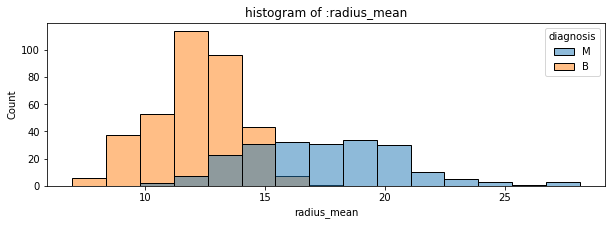

In [100]:
# -- standard histogram defaults to "layer" when hue is present -- 
plt.figure(figsize=(10,3))
sns.histplot(data=cancer, 
             x="radius_mean", 
             hue="diagnosis",
             #multiple="layer", # -- layer --
             bins=15)
plt.title("histogram of :{}".format("radius_mean"))
plt.show()

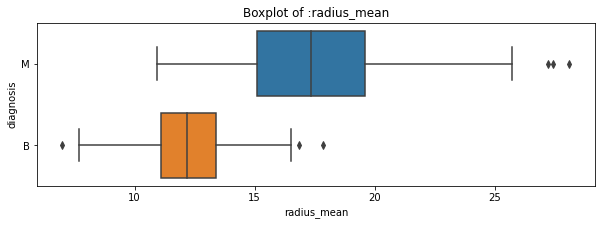

In [101]:
# -- standard boxplot -- 
plt.figure(figsize=(10,3))
sns.boxplot(data=cancer, 
             x="radius_mean", 
             y="diagnosis",
           )
plt.title("Boxplot of :{}".format("radius_mean"))
plt.show()

> NOTE: you can see from both charts above (histogram & boxplot) the distribution of "radius_mean" is different for Benign and Malignant tumors ~ which means it's likely a good predictor of malignant tumors. 


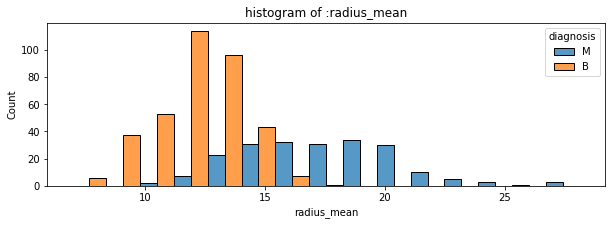

In [102]:
# -- dodge histogram -- 
plt.figure(figsize=(10,3))
sns.histplot(data=cancer, 
             x="radius_mean", 
             hue="diagnosis",
             multiple="dodge", # -- dodge --
             bins=15)
plt.title("histogram of :{}".format("radius_mean"))
plt.show()

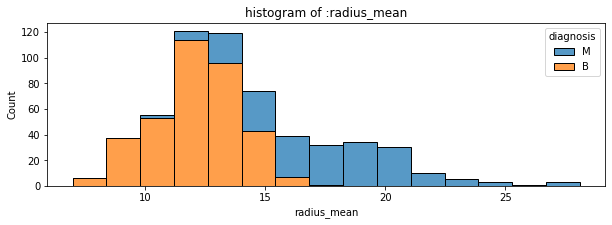

In [103]:
# -- stack histogram -- 
plt.figure(figsize=(10,3))
sns.histplot(data=cancer, 
             x="radius_mean", 
             hue="diagnosis",
             multiple="stack", # -- stack --
             bins=15)
plt.title("histogram of :{}".format("radius_mean"))
plt.show()

### FILL is the bomb


---

I like to use `multiple="fill"` why? it shows the explict relationship between the variable and the target.

USE THIS !!! 

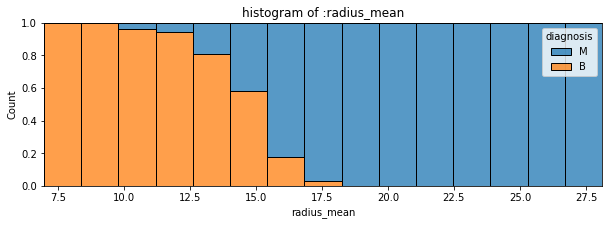

In [104]:
# -- fill histogram -- 
plt.figure(figsize=(10,3))
sns.histplot(data=cancer, 
             x="radius_mean", 
             hue="diagnosis",
             multiple="fill", # -- fill --
             bins=15)
plt.title("histogram of :{}".format("radius_mean"))
plt.show()






### Automate Exploration


---

Let's put our automation skills to practice and build a function and loop to create both histograms and boxplots of the numeric variables relative to the diagnosis. 

recipe:
- get plotting code working
- wrapper it in a function
- parameterize it
- loop over numeric variables
- improve. 


In [106]:
column = "radius_mean"
pivot_table = pd.pivot_table(data=cancer,
               values=column, 
               index="diagnosis", 
               aggfunc=["mean","min","max","median"]).reset_index().T


pivot_table            

,,0,1
diagnosis,,B,M
mean,radius_mean,12.146524,17.46283
min,radius_mean,6.981,10.95
max,radius_mean,17.85,28.11
median,radius_mean,12.2,17.325


In [111]:
# get base code working
res = (cancer
       .groupby("diagnosis")
       .agg({column:["mean","min","max","median", "std"]})
       .round(3)
       .reset_index()
       .T
       .reset_index()
       .rename(columns={"level_1":"measure",
                        0:"B",
                        1:"M"}) # rename the columns 
       .drop("level_0",axis=1) # drop column 
       .drop(index=0) # drop first row

       
)
res


,measure,B,M
1,mean,12.147,17.463
2,min,6.981,10.95
3,max,17.85,28.11
4,median,12.2,17.325
5,std,1.781,3.204


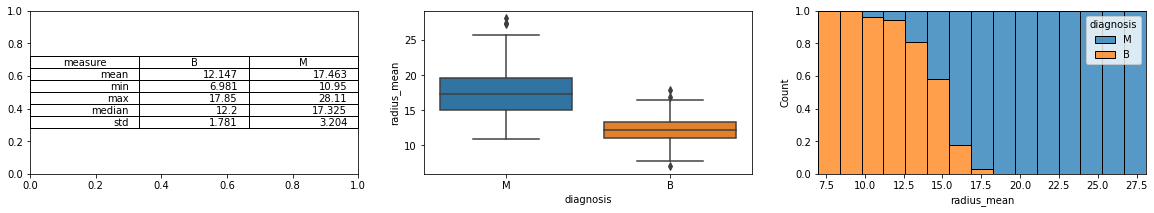

In [112]:

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 3));

# get base code working
res = (cancer
       .groupby("diagnosis")
       .agg({column:["mean","min","max","median", "std"]})
       .round(3)
       .reset_index()
       .T
       .reset_index()
       .rename(columns={"level_1":"measure",
                        0:"B",
                        1:"M"}) # rename the columns 
       .drop("level_0",axis=1) # drop column 
       .drop(index=0) # drop first row
)

# make a table object
table = axs[0].table(cellText=res.values, colLabels=res.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)


sns.boxplot(data=cancer, 
             y="radius_mean", 
             x="diagnosis",
            ax=axs[1]
           )

sns.histplot(data=cancer, 
             x="radius_mean", 
             hue="diagnosis",
             multiple="fill", # -- fill --
             bins=15,
             ax=axs[2]);

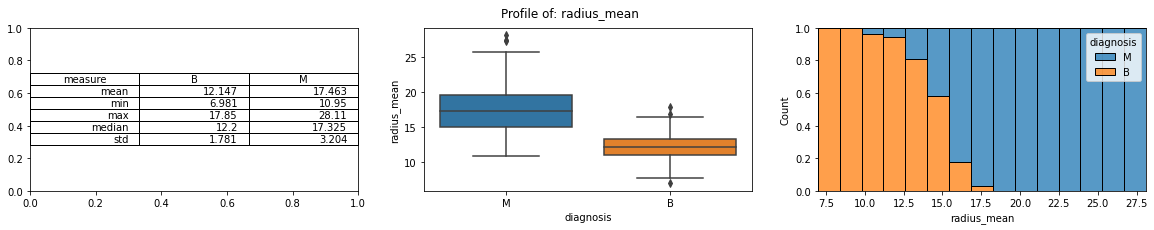

In [113]:
# make a function 
def profile_column():
  column = "radius_mean"
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 3));

  # get base code working
  res = (cancer
        .groupby("diagnosis")
        .agg({column:["mean","min","max","median", "std"]})
        .round(3)
        .reset_index()
        .T
        .reset_index()
        .rename(columns={"level_1":"measure",
                          0:"B",
                          1:"M"}) # rename the columns 
        .drop("level_0",axis=1) # drop column 
        .drop(index=0) # drop first row
  )

  # make a table object
  table = axs[0].table(cellText=res.values, colLabels=res.columns, loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)


  sns.boxplot(data=cancer, 
              y=column, 
              x="diagnosis",
              ax=axs[1]
            )

  sns.histplot(data=cancer, 
              x=column, 
              hue="diagnosis",
              multiple="fill", # -- fill --
              bins=15,
              ax=axs[2]);
  # Add a title to the figure
  fig.suptitle('Profile of: {}'.format(column))
  plt.show()


profile_column()  

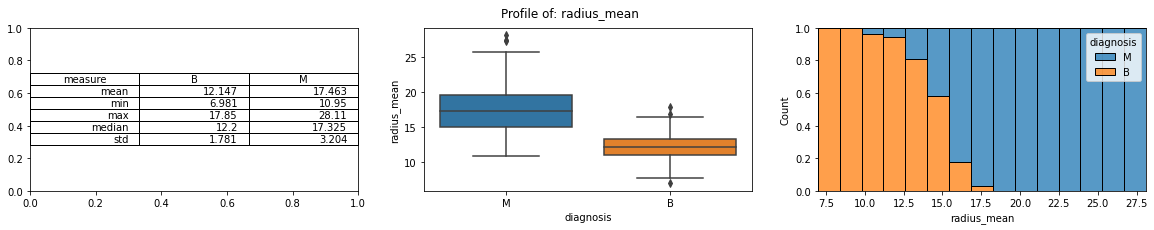

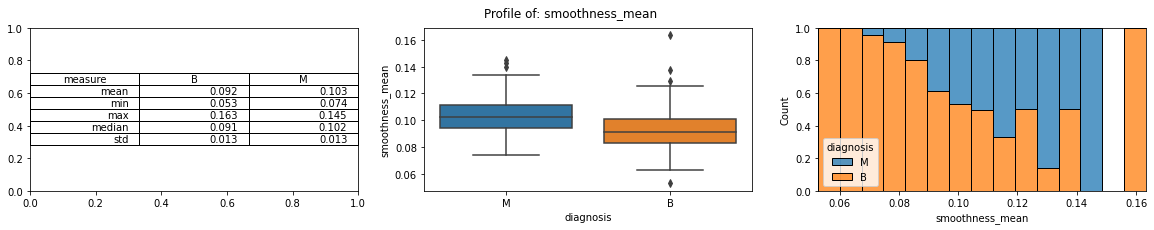

In [115]:
# -- parameterize it! 
# make a function 
def profile_column(column):
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 3));

  # get base code working
  res = (cancer
        .groupby("diagnosis")
        .agg({column:["mean","min","max","median", "std"]})
        .round(3)
        .reset_index()
        .T
        .reset_index()
        .rename(columns={"level_1":"measure",
                          0:"B",
                          1:"M"}) # rename the columns 
        .drop("level_0",axis=1) # drop column 
        .drop(index=0) # drop first row
  )

  # make a table object
  table = axs[0].table(cellText=res.values, colLabels=res.columns, loc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)


  sns.boxplot(data=cancer, 
              y=column, 
              x="diagnosis",
              ax=axs[1]
            )

  sns.histplot(data=cancer, 
              x=column, 
              hue="diagnosis",
              multiple="fill", # -- fill --
              bins=15,
              ax=axs[2]);
  # Add a title to the figure
  fig.suptitle('Profile of: {}'.format(column))
  plt.show()


profile_column(column = "radius_mean")  
profile_column(column = "smoothness_mean") 

area_mean


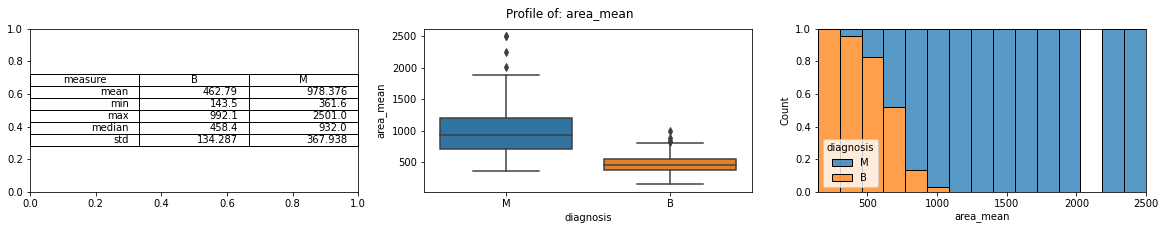

area_se


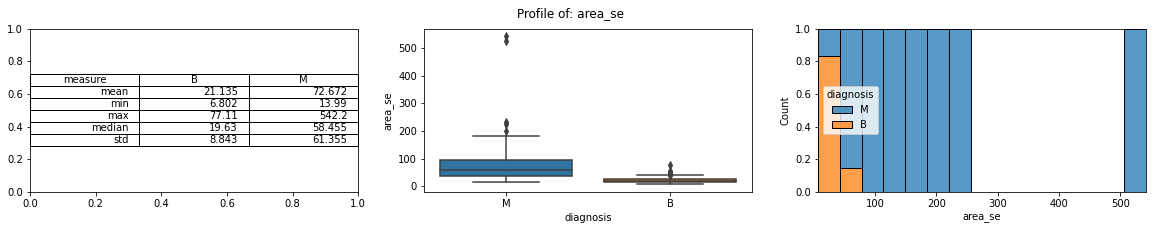

area_worst


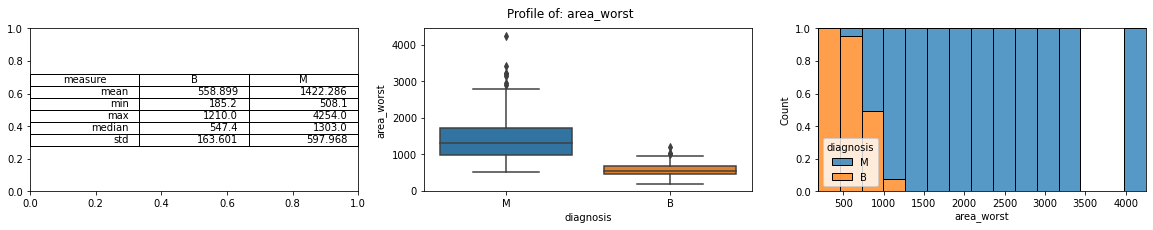

compactness_mean


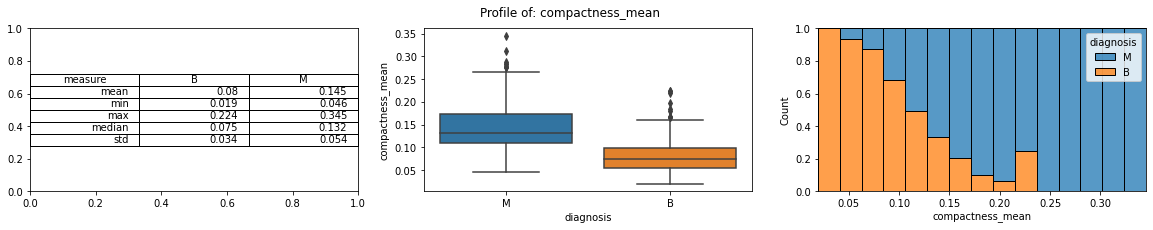

compactness_se


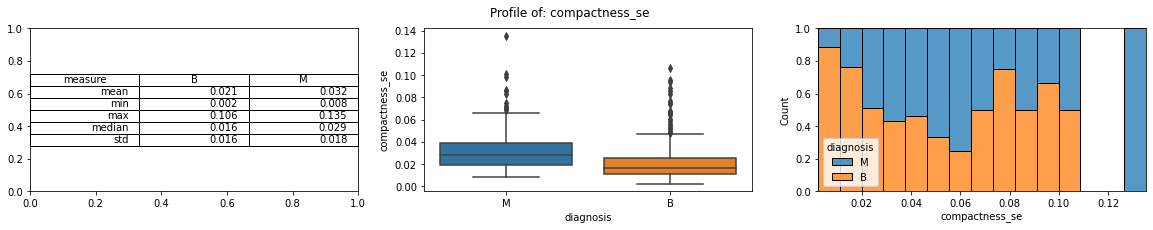

compactness_worst


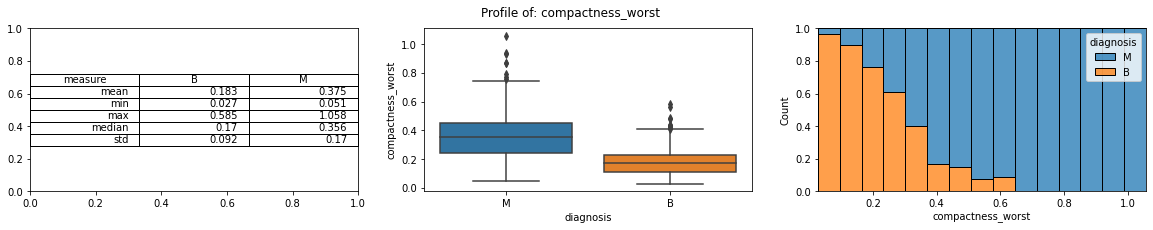

concave_points_mean


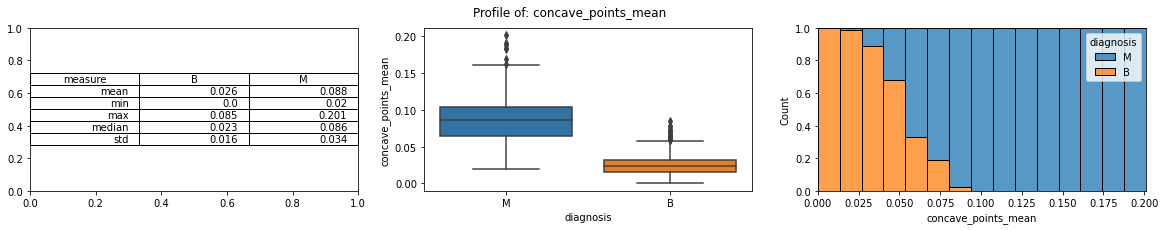

concave_points_se


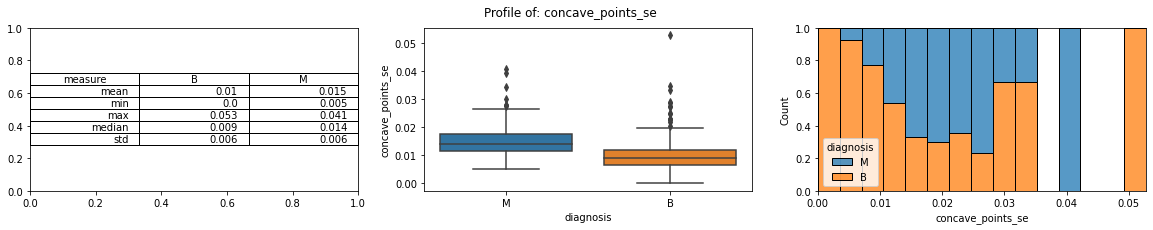

concave_points_worst


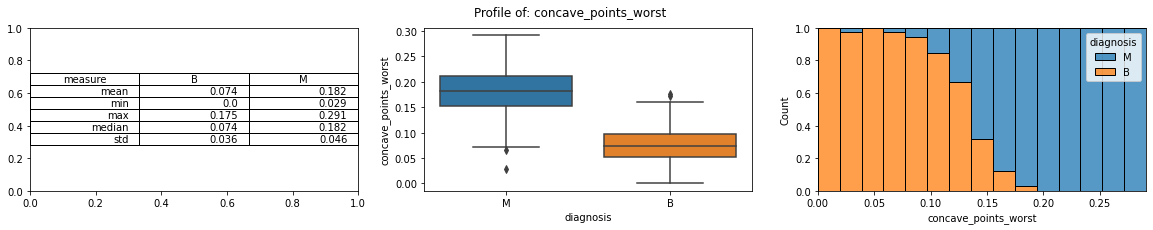

concavity_mean


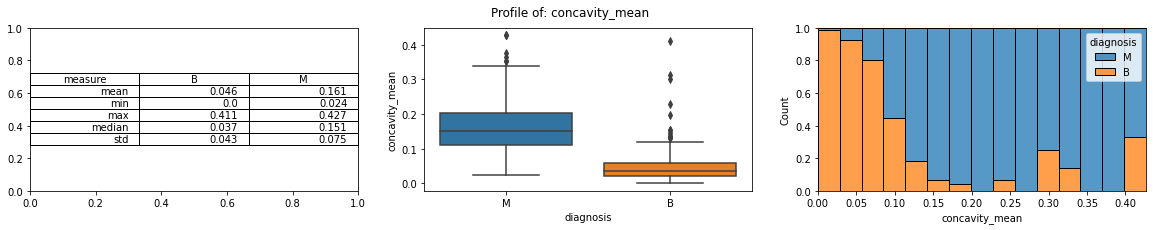

concavity_se


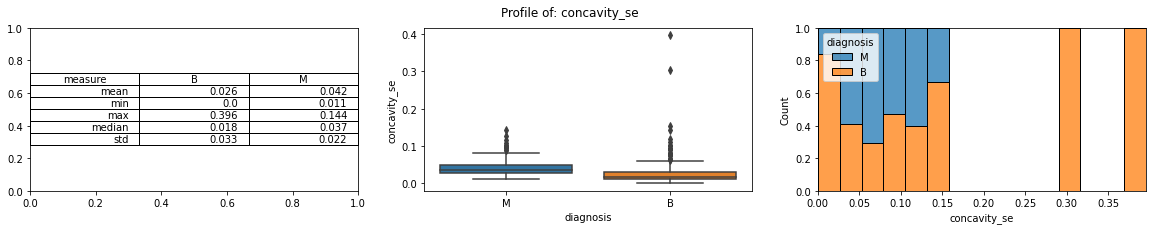

concavity_worst


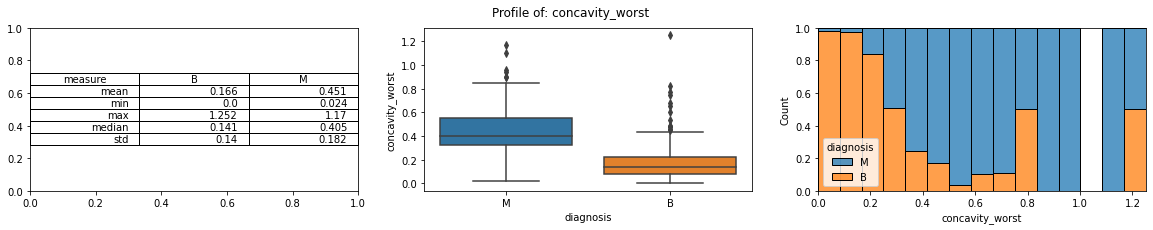

fractal_dimension_mean


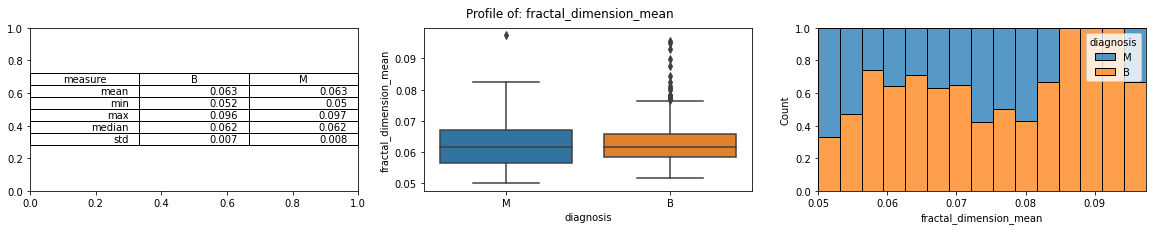

fractal_dimension_se


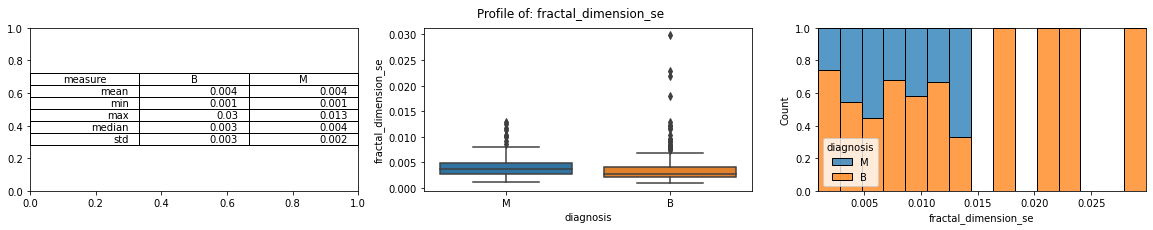

fractal_dimension_worst


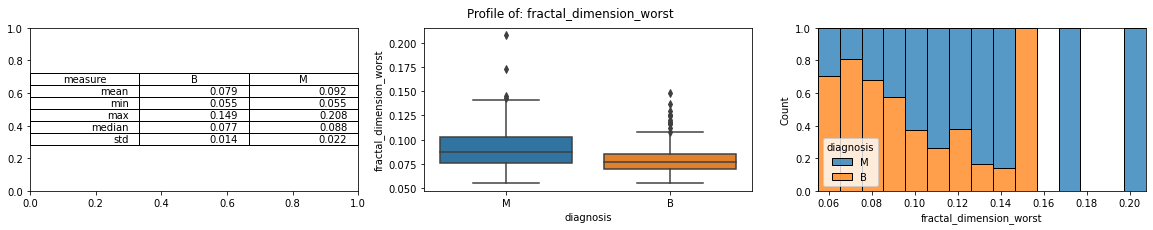

perimeter_mean


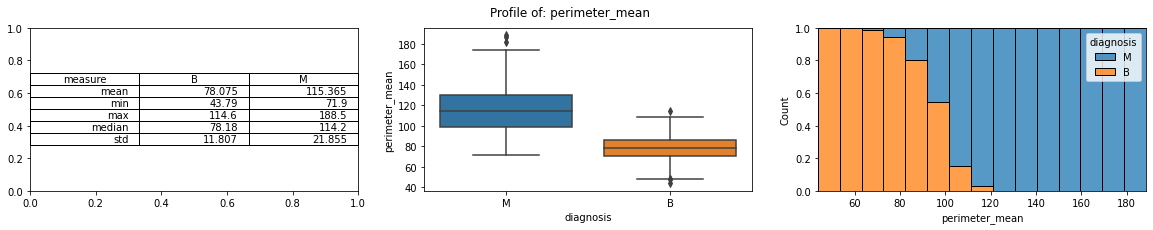

perimeter_se


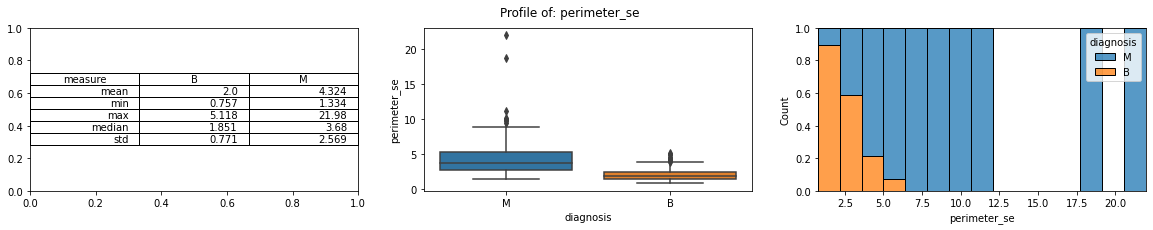

perimeter_worst


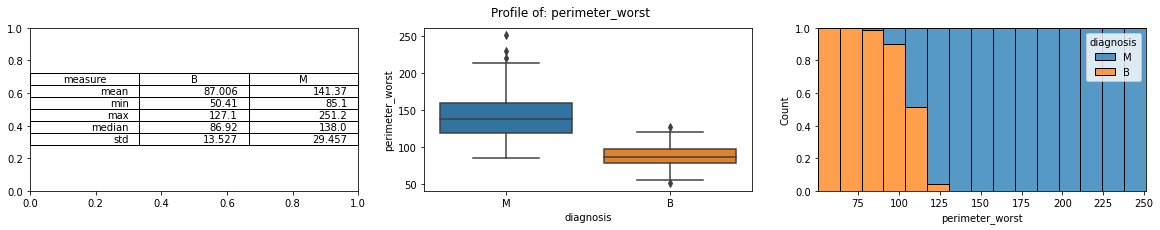

radius_mean


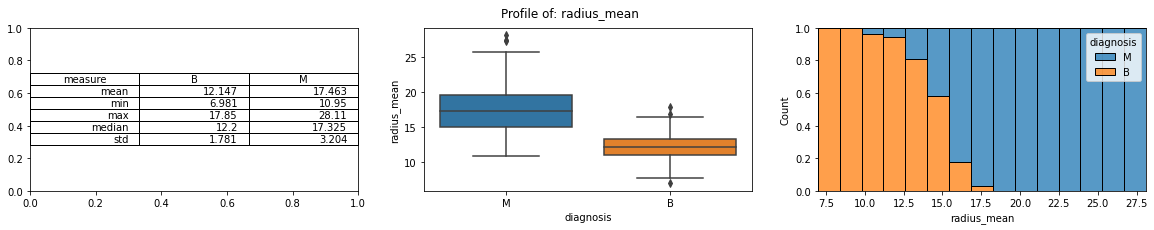

radius_se


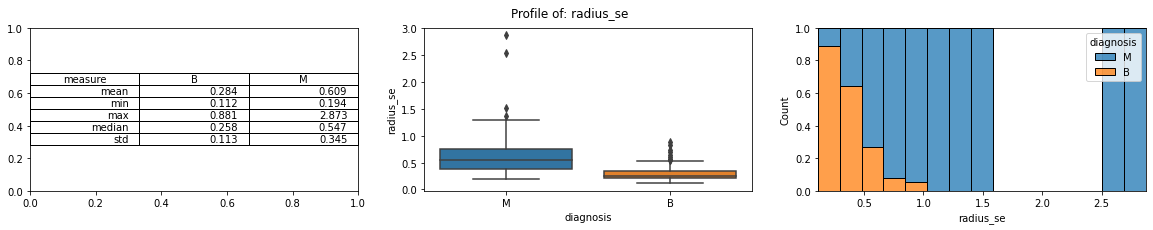

radius_worst


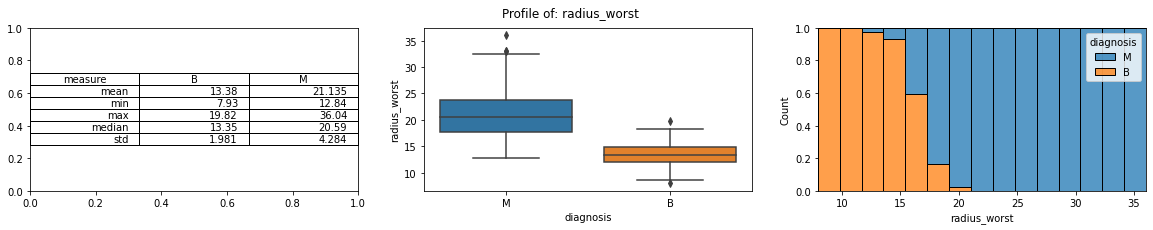

smoothness_mean


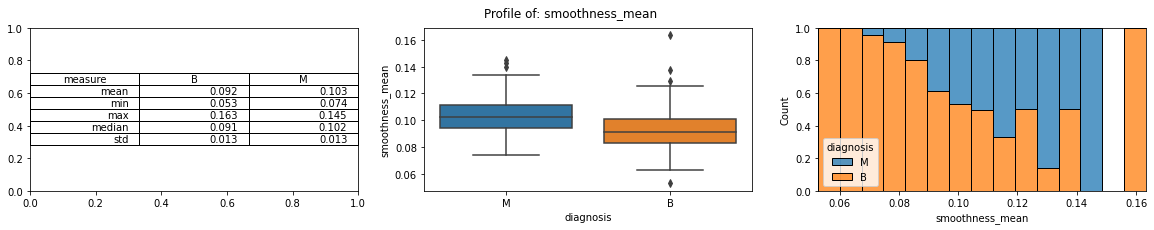

smoothness_se


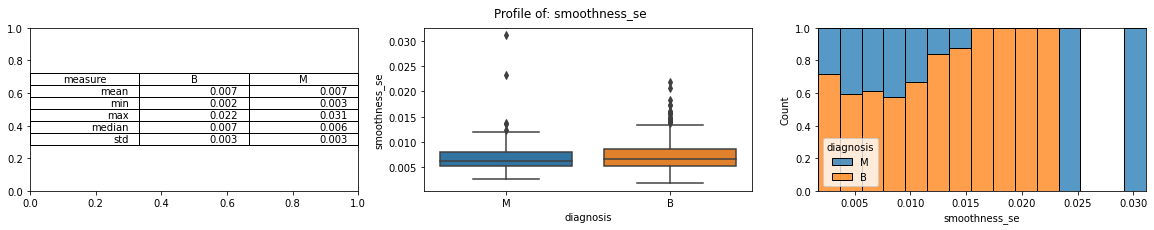

smoothness_worst


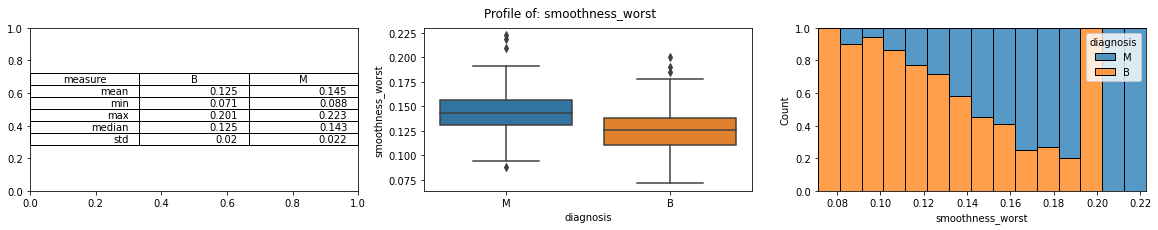

symmetry_mean


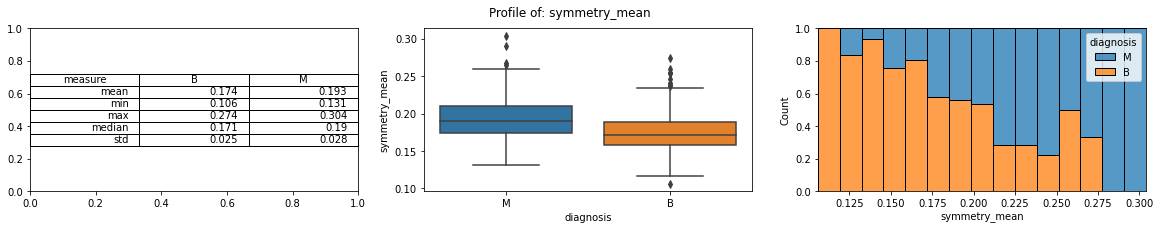

symmetry_se


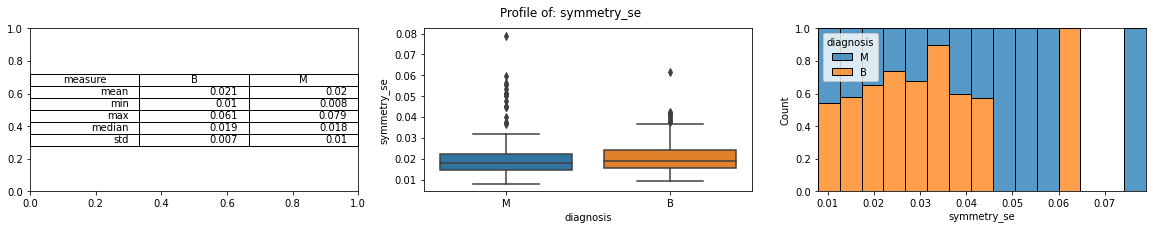

symmetry_worst


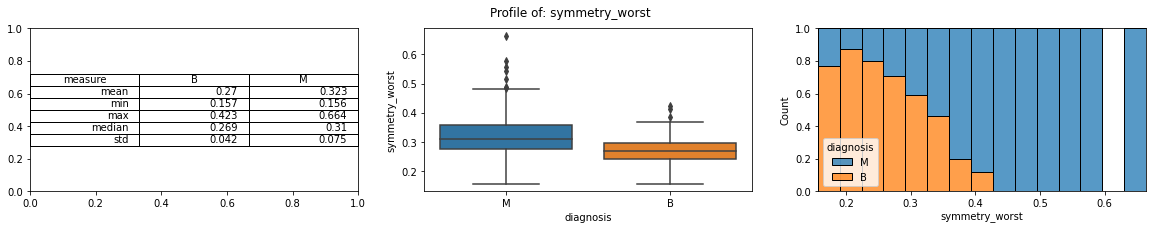

texture_mean


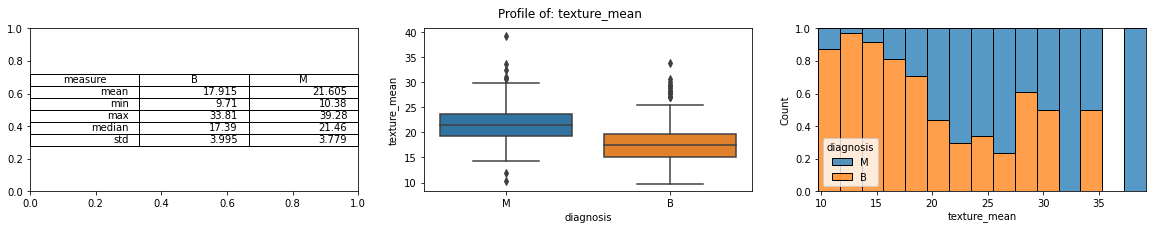

texture_se


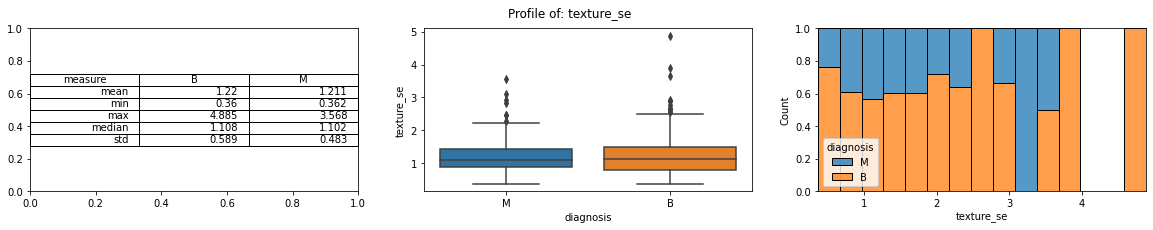

texture_worst


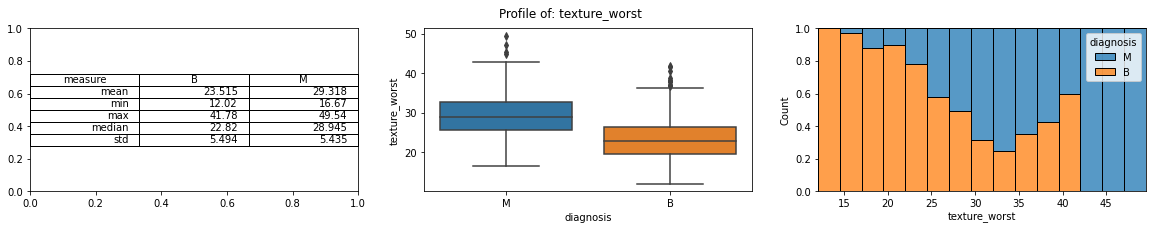

In [116]:
# -- loop -- 
# Get numeric colujmns 
num_cols = cancer.select_dtypes(include="number").columns
# Exclude the 'id' column
num_cols = num_cols.difference(['id'])

# print(num_cols)

# setup loop 
for col in num_cols:
  print(col)
  profile_column(col)  


# Part 2. Model Building


---

Building models is easy if you know the recipe. This is my sugar cookie recipe  logistic regression and then we'll do version for a decision tree

Sugar Cookie Recipe:
1. partition data 75 %(training) / 25% (test)
2. train models 
  - logisitc regression 
  - decision tree 
3. evaluate models
  - accuracy
  - recall
  - precision
  - AUC



## 1. Partitioning 75/25


---


Partitioning our data into training and testing sets is an essential step when building a model because it allows us to evaluate the performance of the model on data that it has not seen before. The 75/25 split is a common partitioning strategy, where 75% of the data is used for training the model, and 25% is used for testing.

Why? The reason for using a separate testing set is to assess the model's ability to generalize to new, unseen data. When training a model, it is possible to overfit the model to the training data, which means that it performs well on the training data but poorly on new data. This occurs when the model memorizes noise, leakage or a host of other reasons. By evaluating the model on a separate testing set, we can get a better estimate of how well the model will perform on new data, i.e. when making predictions! 

## Train_Test_Split

Scikit-learn's train_test_split function is used to split a dataset into two subsets: one for training a model and another for testing the model's performance. 

train_test_split allows you to randomly split a dataset into two separate sets. Typically, the larger portion of the dataset is used for training, while the smaller portion is used for testing. This function provides a way to estimate the performance of the machine learning model on an independent dataset.



In [118]:
train, test = train_test_split(cancer,test_size=0.30)

print("train pct: {:2.2%}".format(train.shape[0]/cancer.shape[0]))
print("test  pct: {:2.2%}".format(test.shape[0]/cancer.shape[0]))

train pct: 69.95%
test  pct: 30.05%


## Setup our Variables 

In [119]:
# -- Split features into categorical and numeric lists --
# target variable name
target = 'diagnosis'

# -- numeric variables --
numeric_features =  cancer.select_dtypes(include="number").columns
# Exclude the 'id' column
numeric_features = numeric_features.difference(['id'])

# -- categorical variables -- we don't have any categories
categorical_features = [] 


numeric_features

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave_points_mean',
       'concave_points_se', 'concave_points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'fractal_dimension_mean',
       'fractal_dimension_se', 'fractal_dimension_worst', 'perimeter_mean',
       'perimeter_se', 'perimeter_worst', 'radius_mean', 'radius_se',
       'radius_worst', 'smoothness_mean', 'smoothness_se', 'smoothness_worst',
       'symmetry_mean', 'symmetry_se', 'symmetry_worst', 'texture_mean',
       'texture_se', 'texture_worst'],
      dtype='object')


## Logisic Regression 

Logistic regression is a statistical modeling method used to analyze the relationship between a set of independent variables and a **binary outcome** variable. In business applications, logistic regression can be used to predict the **probability of an event occurring**, such as the likelihood of a customer purchasing a product, responding to direct marketing, identifying an eamil as spam/not-spam OR in our case whether a tumor is Benign or Malignant! 



---

The logistic equation is expressed as follows:

P(Y=1) = 1 / (1 + e^(-z))

Where:

- P(Y=1) represents the probability of the binary event occurring.
- e is the mathematical constant approximately equal to 2.71828.
- z is the linear combination of the independent variables and their corresponding logistic coefficients.


In [120]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(train[numeric_features], train[target])

# Print the coefficients
print('Intercept:', lr_model.intercept_)
print('Coefficients:', lr_model.coef_)



Intercept: [-0.1714746]
Coefficients: [[ 0.01694199  0.08409088  0.01168904  0.16285421  0.03111392  0.4717213
   0.10410298  0.01262783  0.19307406  0.24035264  0.04961991  0.63213761
   0.00980025  0.00252669  0.04286618 -0.31678717 -0.12043254  0.28554599
  -0.90862592 -0.03009771 -0.86516885  0.03990897  0.00481244  0.07499172
   0.05486358  0.01324259  0.1460187  -0.36087111 -0.24610789  0.38346051]]


1/(1+e^-(-0.17 + radius_mean*0.01694199 + ... )

### About Variable Importance 
Did you know you can calculate the relative importance of a variable to a model? Variable importance is a measure of the impact or contribution of each independent variable to the prediction performance of a machine learning model. We call this **Global Interpretablity** and it is an essential step in  model interpretation. 

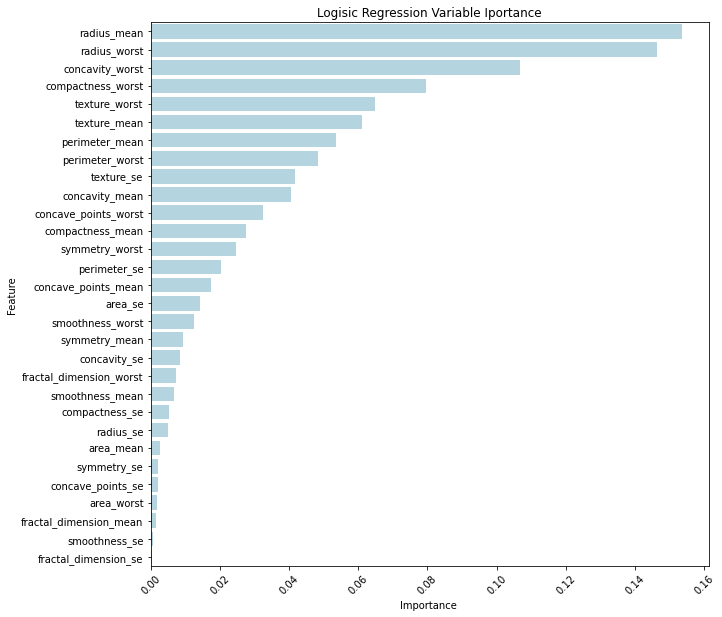

In [121]:
# -- get feature importance 
# Calculate the feature importance using the absolute value of the coefficients
importance = abs(lr_model.coef_[0])

# Normalize the feature importance
importance = importance / importance.sum()

# -- summarize feature importance into a dictionary 
feature_imp ={}
for i,v in enumerate(importance):
    feature_imp[numeric_features[i]] = v

# make the dictionary a data frame 
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index',
                                     columns=['importance'])

# -- prep and filter our dataframe, only need to look at the important features i.e. things > 0 
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index':'feature'})
               .sort_values('importance',ascending=False)
               #.query('importance > 0.001')
               )

# -- plot that 
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Logisic Regression Variable Iportance')
plt.ylabel('Feature')
plt.xlabel('Importance ')
plt.xticks(rotation=45)
plt.show()


## Decision Tree 


---

A decision tree is a flowchart-like structure that represents a series of decisions (IF column >= THEN .. ELSE < ... ). It is called a "tree" because it starts with a single root node and branches out into many possible outcomes or "leaves."

One of the key benefits of decision trees is that they are easy to understand and interpret, even for non-technical users. Because of their IF THEN ELSE like structure - it is easy to grasp the basic concepts of decision trees and use them to analyze complex business problems. 



In [134]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth=10)
model_dtc.fit(train[numeric_features], train[target])

DecisionTreeClassifier(max_depth=10)

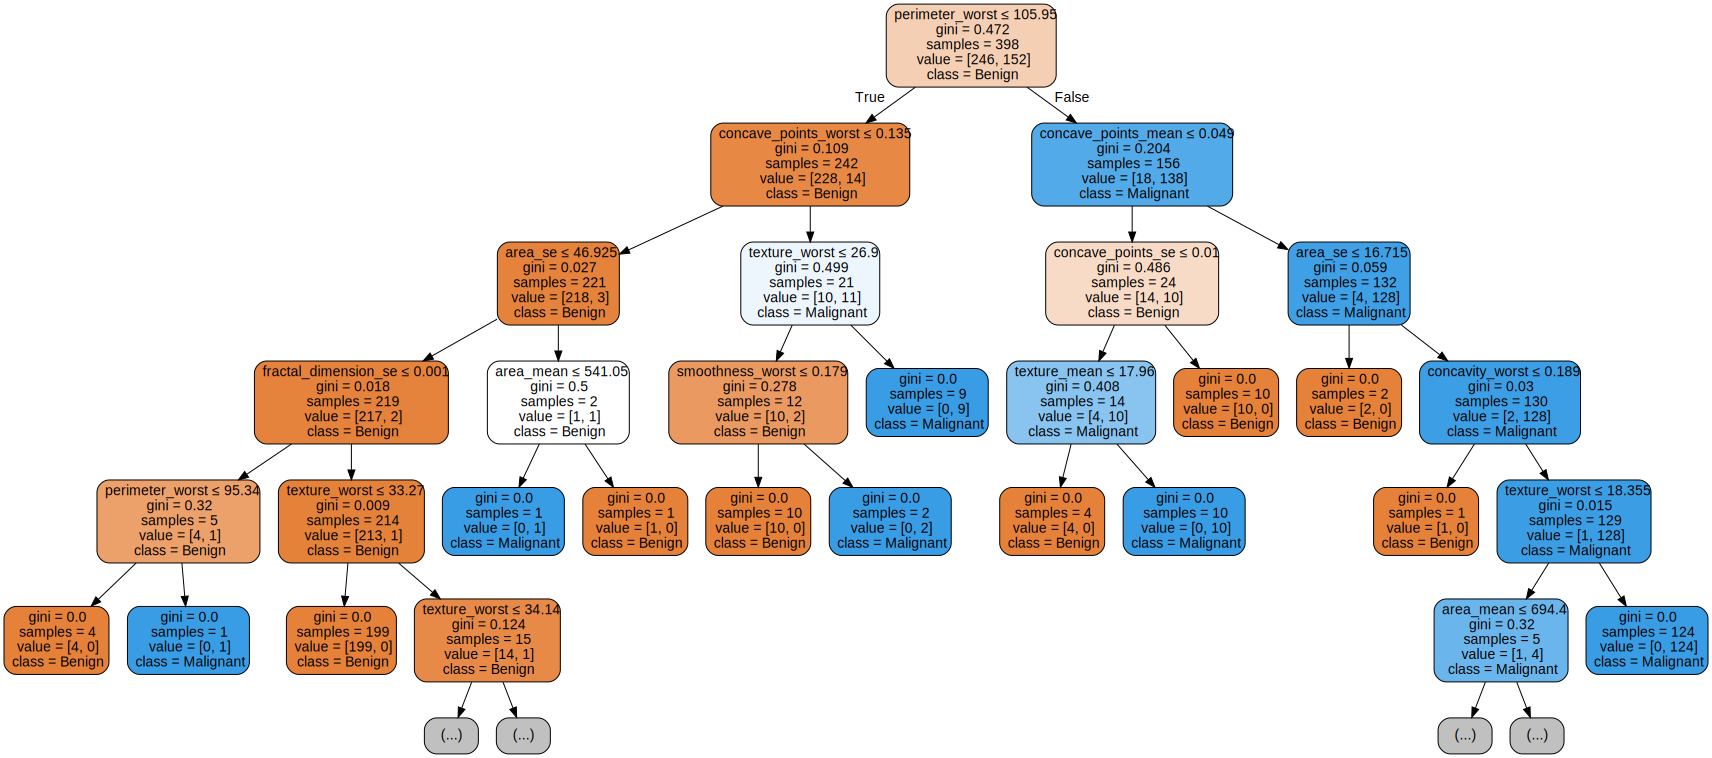

In [135]:
# -- chart of tree 
import graphviz 
dot_data = tree.export_graphviz(model_dtc, 
                                out_file=None,
            feature_names = numeric_features,
            class_names=["Benign", "Malignant"],
            max_depth = 5,
            filled=True, 
            rounded=True,  
            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [60]:
from sklearn.tree import export_text   #- export tree as text rules 

# -- Text based Rules for your Tree 
# Extract the decision rules
rules = export_text(model_dtc, 
                    feature_names = numeric_features.tolist()
                    )
print(rules)

|--- radius_worst <= 16.79
|   |--- concave_points_worst <= 0.16
|   |   |--- symmetry_se <= 0.01
|   |   |   |--- class: M
|   |   |--- symmetry_se >  0.01
|   |   |   |--- concave_points_worst <= 0.12
|   |   |   |   |--- class: B
|   |   |   |--- concave_points_worst >  0.12
|   |   |   |   |--- class: B
|   |--- concave_points_worst >  0.16
|   |   |--- area_se <= 18.10
|   |   |   |--- perimeter_se <= 1.43
|   |   |   |   |--- class: M
|   |   |   |--- perimeter_se >  1.43
|   |   |   |   |--- class: B
|   |   |--- area_se >  18.10
|   |   |   |--- class: M
|--- radius_worst >  16.79
|   |--- concavity_worst <= 0.22
|   |   |--- texture_mean <= 19.86
|   |   |   |--- class: B
|   |   |--- texture_mean >  19.86
|   |   |   |--- class: M
|   |--- concavity_worst >  0.22
|   |   |--- texture_mean <= 14.98
|   |   |   |--- compactness_se <= 0.02
|   |   |   |   |--- class: B
|   |   |   |--- compactness_se >  0.02
|   |   |   |   |--- class: M
|   |   |--- texture_mean >  14.98
|   | 

## Calculate Feature Importance of a TREE model

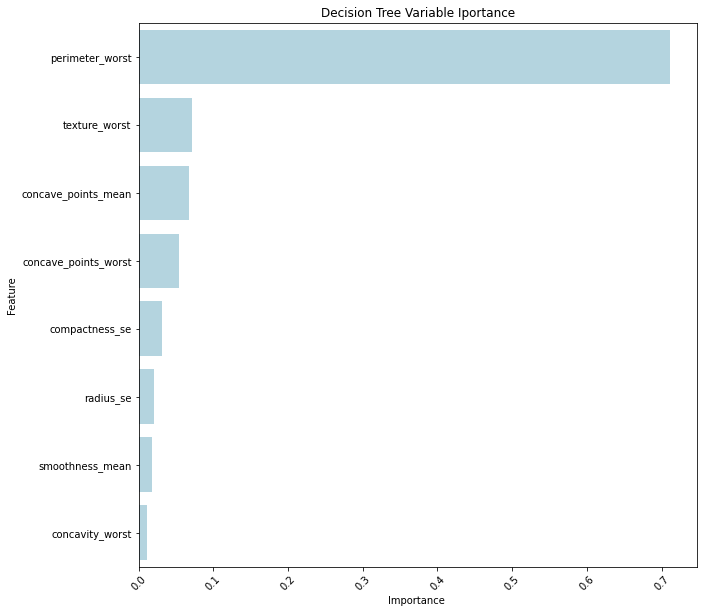

In [124]:
# -- get feature importance 
importance = model_dtc.feature_importances_

# -- summarize feature importance into a dictionary 
feature_imp ={}
for i,v in enumerate(importance):
    feature_imp[numeric_features[i]] = v

# make the dictionary a data frame 
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index',
                                     columns=['importance'])

# -- prep and filter our dataframe, only need to look at the important features i.e. things > 0 
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index':'feature'})
               .sort_values('importance',ascending=False)
               .query('importance > 0.01'))

# -- plot that 
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Decision Tree Variable Iportance')
plt.ylabel('Feature')
plt.xlabel('Importance ')
plt.xticks(rotation=45)
plt.show()


## Model Evaluation 


---

Let's evaluate both the logistic regression model and the decsion tree model. 

- Accuracy
- Recall
- Precision 
- Area under the ROC curve



In [125]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# -- step 1. make predictions -- 
pred_lr_train = lr_model.predict(train[numeric_features])
pred_lr_test  = lr_model.predict(test[numeric_features])

pred_dtc_train = model_dtc.predict(train[numeric_features])
pred_dtc_test  = model_dtc.predict(test[numeric_features])


### Default Accuracy, i.e. do nothing predict tumor as Benign
accuracy_default = train[target].value_counts(normalize='True')[0]
print("Default Accuracy : {:2.2%}".format(accuracy_default))
print("--- logistic accuracy ---")

accuracy_train = accuracy_score(train[target], pred_lr_train)
accuracy_test = accuracy_score(test[target], pred_lr_test)
print("Train Accuracy   : {:2.2%}".format(accuracy_train))
print("Test Accuracy    : {:2.2%}".format(accuracy_test))
print("--- decision tree accuracy ---")
accuracy_default = train[target].value_counts(normalize='True')[0]
accuracy_train = accuracy_score(train[target], pred_dtc_train)
accuracy_test = accuracy_score(test[target], pred_dtc_test)
print("Train Accuracy   : {:2.2%}".format(accuracy_train))
print("Test Accuracy    : {:2.2%}".format(accuracy_test))


Default Accuracy : 61.81%
--- logistic accuracy ---
Train Accuracy   : 93.72%
Test Accuracy    : 95.91%
--- decision tree accuracy ---
Train Accuracy   : 99.25%
Test Accuracy    : 93.57%


In [126]:
from sklearn.metrics import recall_score

print("--- recall ---")
recall_train = recall_score(train[target].values, pred_lr_train, pos_label='M')
recall_test = recall_score(test[target], pred_lr_test, pos_label='M')
print("--- logistic recall ---")
print("Train Recall   : {:2.2%}".format(recall_train))
print("Test Recall    : {:2.2%}\n".format(recall_test))

recall_train = recall_score(train[target].values, pred_dtc_train, pos_label='M')
recall_test = recall_score(test[target], pred_dtc_test, pos_label='M')
print("--- decision tree recall ---")
print("Train Recall   : {:2.2%}".format(recall_train))
print("Test Recall    : {:2.2%}".format(recall_test))


--- recall ---
--- logistic recall ---
Train Recall   : 90.13%
Test Recall    : 95.00%

--- decision tree recall ---
Train Recall   : 98.68%
Test Recall    : 95.00%


In [127]:
from sklearn.metrics import precision_score

print("--- precision ---\n")
precision_train = precision_score(train[target].values, pred_lr_train, pos_label='M')
precision_test = precision_score(test[target], pred_lr_test, pos_label='M')
print("--- logistic precision ---")
print("Train precision   : {:2.2%}".format(precision_train))
print("Test precision    : {:2.2%}\n".format(precision_test))

precision_train = precision_score(train[target].values, pred_dtc_train, pos_label='M')
precision_test = precision_score(test[target], pred_dtc_test, pos_label='M')
print("--- decision tree recall ---")
print("Train precision   : {:2.2%}".format(precision_train))
print("Test precision    : {:2.2%}".format(precision_test))

--- precision ---

--- logistic precision ---
Train precision   : 93.20%
Test precision    : 93.44%

--- decision tree recall ---
Train precision   : 99.34%
Test precision    : 87.69%


## ROC Cruve

In [129]:
from sklearn.metrics import roc_auc_score, roc_curve

# -- step 1. get predicted probablities -- 
proba_lr_train = lr_model.predict_proba(train[numeric_features])[:,1]
proba_lr_test  = lr_model.predict_proba(test[numeric_features])[:,1]

proba_dtc_train = model_dtc.predict_proba(train[numeric_features])[:,1]
proba_dtc_test  = model_dtc.predict_proba(test[numeric_features])[:,1]


# Calculate the AUC score
auc_lr_train = roc_auc_score(train[target], proba_lr_train)
auc_lr_test = roc_auc_score(test[target], proba_lr_test)

auc_dtc_train = roc_auc_score(train[target], proba_dtc_train)
auc_dtc_test = roc_auc_score(test[target], proba_dtc_test)

print("-- Area Under Curve --\n")
print("-- logistic regression --")
print("AUC score train : {:.4f}".format(auc_lr_train))
print("AUC score test  : {:.4f}\n".format(auc_lr_test))

print("-- decision tree  --")
print("AUC score train : {:.4f}".format(auc_dtc_train))
print("AUC score test  : {:.4f}".format(auc_dtc_test))

-- Area Under Curve --

-- logistic regression --
AUC score train : 0.9892
AUC score test  : 0.9946

-- decision tree  --
AUC score train : 0.9952
AUC score test  : 0.8977


### ROC Curves

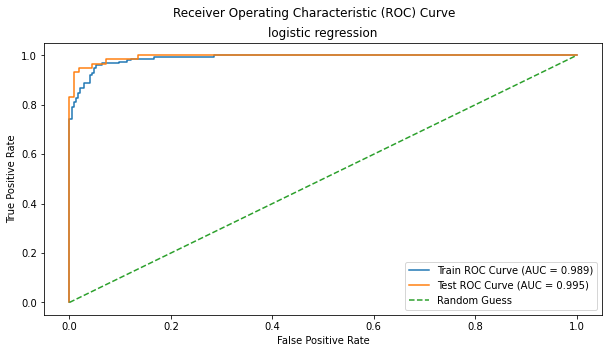

In [130]:

train_lr_fpr, train_lr_tpr, train_lr_proba = roc_curve(train[target], proba_lr_train, pos_label="M")
test_lr_fpr, test_lr_tpr, test_lr_proba = roc_curve(test[target], proba_lr_test, pos_label="M")

# Plot the ROC curves
plt.figure(figsize=(10,5))
plt.plot(train_lr_fpr, train_lr_tpr, label="Train ROC Curve (AUC = {:.3f})".format(auc_lr_train))
plt.plot(test_lr_fpr, test_lr_tpr, label="Test ROC Curve (AUC = {:.3f})".format(auc_lr_test))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.title("logistic regression")
plt.legend()
plt.show()


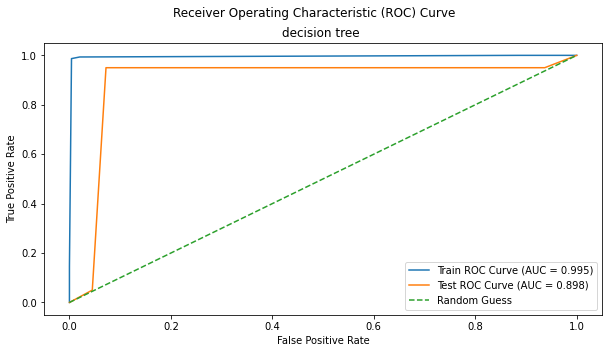

In [131]:

train_dtc_fpr, train_dtc_tpr, train_dtc_proba = roc_curve(train[target], proba_dtc_train, pos_label="M")
test_dtc_fpr, test_dtc_tpr, test_dtc_proba = roc_curve(test[target], proba_dtc_test, pos_label="M")

# Plot the ROC curves
plt.figure(figsize=(10,5))
plt.plot(train_dtc_fpr, train_dtc_tpr, label="Train ROC Curve (AUC = {:.3f})".format(auc_dtc_train))
plt.plot(test_dtc_fpr, test_dtc_tpr, label="Test ROC Curve (AUC = {:.3f})".format(auc_dtc_test))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.title("decision tree ")
plt.legend()
plt.show()


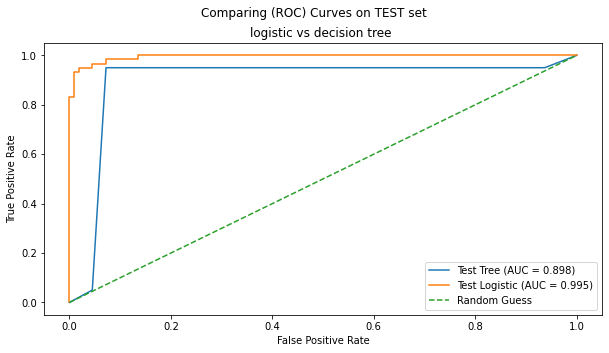

In [132]:

# Plot the ROC curves
plt.figure(figsize=(10,5))
plt.plot(test_dtc_fpr,test_dtc_tpr, label="Test Tree (AUC = {:.3f})".format(auc_dtc_test))
plt.plot(test_lr_fpr, test_lr_tpr, label="Test Logistic (AUC = {:.3f})".format(auc_lr_test))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Comparing (ROC) Curves on TEST set')
plt.title("logistic vs decision tree ")
plt.legend()
plt.show()

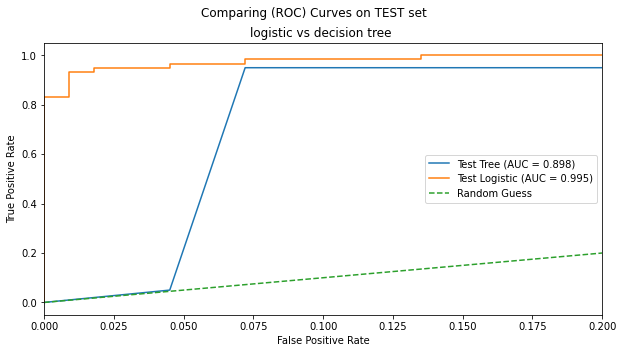

In [133]:
# Plot the ROC curves
plt.figure(figsize=(10,5))
plt.plot(test_dtc_fpr,test_dtc_tpr, label="Test Tree (AUC = {:.3f})".format(auc_dtc_test))
plt.plot(test_lr_fpr, test_lr_tpr, label="Test Logistic (AUC = {:.3f})".format(auc_lr_test))
# Limit the range of the x-axis
plt.xlim([0, 0.2])
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Comparing (ROC) Curves on TEST set')
plt.title("logistic vs decision tree ")
plt.legend()
plt.show()